In [1]:
%matplotlib widget

# Principles of Data Science

### Lecture 4: Probability Density Functions and Bayesian Inference

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Probability Density Functions

- Today's lecture expands on and explores more to do with continuous probability distributions

- Learning objectives:
    - Understand <font color="blue">properties of distributions</font> (p.d.f.s, c.d.f.s, marginal and conditional probabilities)
    - Understand what the <font color="blue">likelihood</font> is and be able to describe the <font color="blue">difference between the likelihood and a p.d.f</font>
    - Understand and be able to deploy <font color="blue">Bayesian inference</font>
    - Realise the impact of <font color="blue">choice of prior</font> on the posterior

## Recap

- Defintions of probability (Bayesian *vs.* frequentist)
- Random variables, p.m.f.s (discrete) and p.d.f.s (continuous) 
- Change of variables requires Jacobian of transform
- if $\vec{X} \sim f(\vec{X})$ and $Y=\vec{h}(\vec{X})$ then p.d.f. $g(\vec{Y})$:

$$ Y \sim g(\vec{Y}) = | J_{h^{-1}}(\vec{X}, \vec{Y}) | f(\vec{X}) $$

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('../mphil.mplstyle')

## Cumalative density functions

<font color="green">*Hand written notes in lectures*</font>

- c.d.f is the integrated p.d.f 
    - statisticians often call it *the* probability distribution

Text(0, 0.5, 'Cumalative Density')

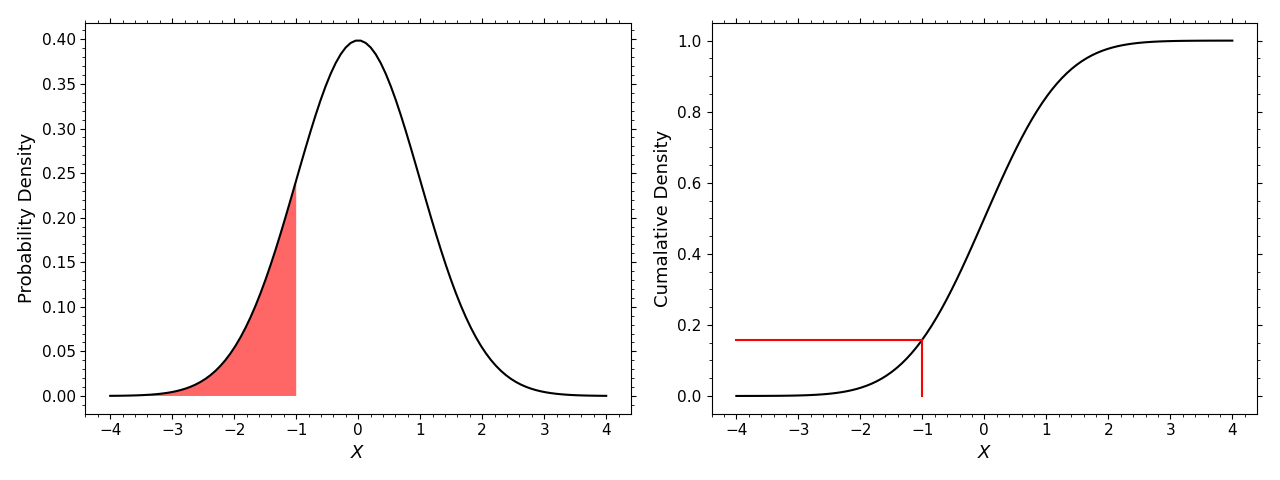

In [3]:
import numpy as np
from scipy.stats import norm

xlim = (-4,4)
x = np.linspace(*xlim, 100)
fig, ax = plt.subplots(1,2, figsize=(12.8,4.8))
ax[0].plot(x, norm.pdf(x), c='k')

xp = -1
xs = np.linspace(xlim[0],xp, 100)
ax[0].fill_between(xs, 0, norm.pdf(xs), fc='r', alpha=0.6)

ax[1].plot(x, norm.cdf(x), c='k')
ax[1].plot( [xp,xp], [0, norm.cdf(xp) ], c='r' )
ax[1].plot( [xlim[0], xp], [norm.cdf(xp), norm.cdf(xp)], c='r' )

ax[0].set_xlabel('$X$')
ax[1].set_xlabel('$X$')
ax[0].set_ylabel('Probability Density')
ax[1].set_ylabel('Cumalative Density')


## Other p.d.f properties

Consider joint density of two random variables, $f(X,Y)$

<font color="green">*Hand written notes in lectures*</font>


- joint p.d.f
- marginal p.d.f
- conditional p.d.f

## Joint, marginal and conditional pdfs


In [4]:
import numpy as np
from scipy.stats import multivariate_normal as mvn, norm

dist = mvn( mean=[0,0], cov=[[4,1],[1,2]] )


xlim = (-6,6)
ylim = (-4,4)
  
x = np.linspace(*xlim,100)
y = np.linspace(*ylim,100)

X, Y = np.meshgrid(x,y)
pos = np.dstack( (X,Y) )
Z = dist.pdf(pos)




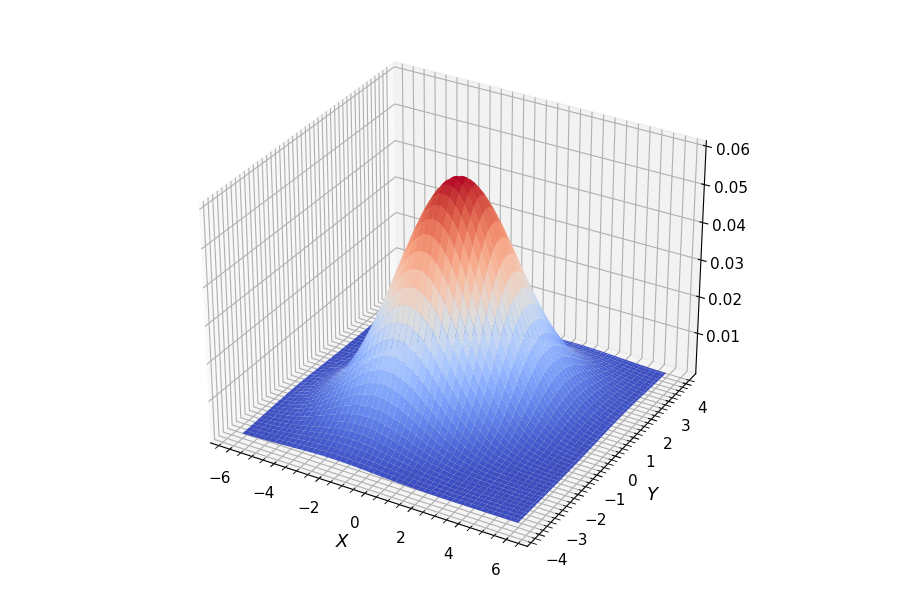

In [5]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
_ = ax.plot_surface(X, Y, dist.pdf(pos), cmap='coolwarm' )


(0.0, 0.29606752515897305, -4.0, 4.0)

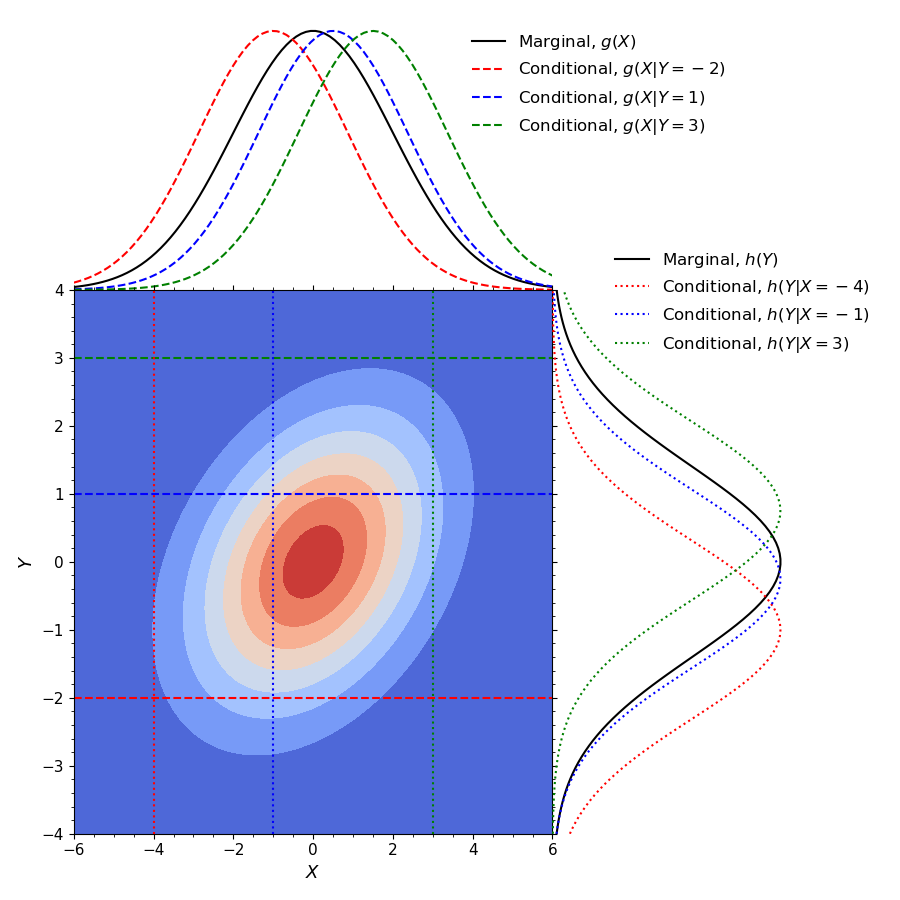

In [6]:
fig, ax = plt.subplots(2,2, figsize=(9, 9), height_ratios=[1,2], width_ratios=[2,1], gridspec_kw={'hspace':0, 'wspace':0} )

# draw joint density
ax[1,0].contourf( X, Y, Z, cmap='coolwarm')

# draw marginals
ax[0,0].plot( x, norm.pdf(x, 0, 2 ), c='k', label='Marginal, $g(X)$' )
ax[1,1].plot( norm.pdf(y, 0, 2**0.5), y, c='k', label='Marginal, $h(Y)$' )

# draw some conditionals
for yc, col in zip([-2,1,3], ['r','b','g']):
    ys = np.full_like(x, yc)
    yv = dist.pdf( np.dstack((x,ys)) )
    yv *= max(norm.pdf(x,0,2))/max(yv)
    ax[0,0].plot( x, yv, c=col, ls='--', label=f'Conditional, $g(X|Y={yc})$' )
    ax[1,0].axhline(yc, c=col, ls='--')

for xc, col in zip( [-4,-1,3], ['r','b','g']):
    xs = np.full_like(y, xc)
    xv = dist.pdf( np.dstack((xs,y)) )
    xv *= max(norm.pdf(y,0,2**0.5))/max(xv)
    ax[1,1].plot( xv, y, c=col, ls=':', label=f'Conditional, $h(Y|X={xc})$' )
    ax[1,0].axvline(xc, c=col, ls=':')


# just styling
ax[1,0].set_xlabel('$X$')
ax[1,0].set_ylabel('$Y$')
ax[0,0].legend(frameon=False, loc='upper left', bbox_to_anchor=(0.8,1))
ax[1,1].legend(frameon=False, loc='upper left', bbox_to_anchor=(0.2,1.1))
ax[0,0].set_xlim( ax[1,0].get_xlim() )
ax[0,0].set_ylim( bottom=0 )
ax[1,1].set_ylim( ax[1,0].get_ylim() )
ax[1,1].set_xlim( left=0 )
ax[0,1].set_visible(False)
ax[0,0].axis('off')
ax[1,1].axis('off')



# <font color="darkred">*Musical interlude...*</font>

## Bayes theorem

<font color="green">*Hand written notes in lectures*</font>

- Bayes' theorem for continuous random variables
- For a Bayesian all parameters are random variables
- Introduction to the likelihood function


## Bayesian inference
- Most Bayesian stuff will be covered in advanced stats course
- Statistical *inference* is the process of <font color='blue'><b>deducing properties of a population or distribution from observed data</b></font>

<img src="plots/InferenceSketch.png" alt="drawing">

## Bayesian inference


Consider a general problem in which we want to <font color='blue'><i>infer</i> the probability distribution</font> of a parameter, $\theta$, from an observed dataset, $x$
 
$$ \color{blue}{p(\theta|x)} = \frac{\color{red}{p(x|\theta)}\color{green}{p(\theta)}}{\color{magenta}{p(x)}} = \frac{\color{red}{p(x|\theta)}\color{green}{p(\theta)}}{\color{magenta}{\int p(x|\theta) p(\theta) d\theta}} $$


 - $\color{green}{p(\theta)}$ is called the "**<font color='green'>prior</font>**" distribution
   - represents our *prior beliefs* about the parameter $\theta$ (which could be nothing)
  
  
 - $\color{red}{p(x|\theta)}$ we have already encountered (see previous lectures) and is the "**<font color='red'>likelihood</font>**"
    - represents the *agreement between our model and our observed data*
 
 
 - $\color{blue}{p(\theta|x)}$ is known as the "**<font color='blue'>posterior</font>**" distribution
    - represents our *knowledge* of the parameter *after* including the data *and* prior beliefs
    - this is what we have *inferred* about the parameter $\theta$ given the data $x$    
 
 
 - $\color{magenta}{p(x)}$ is the marginal distribution of the data, sometimes called the "**<font color='magenta'>evidence</font>**"
    - *it is not* a function of $\theta$ so just a number which normalises the posterior
    - we do not normally care about its value because it just scales the posterior

For inference of the posterior distribution *shape* we can simply make use of

$$ \color{blue}{p(\theta|x)} \propto \color{red}{p(x|\theta)} \color{green}{p(\theta)} $$


$$ \color{blue}{\text{Posterior}} \propto \color{red}{\text{Likelihood}} \times \color{green}{\text{Prior}} $$

<img src="plots/BayesSketch.png" alt="drawing">

## A Bayesian Inference Example

 - Assume we have some data which <font color='blue'>measures the mass of a new particle</font>
 - We will use this data to <font color='red'><i>infer</i> a probability distribution for the particle mass</font>

**Step 1.** Let's generate our data (say 200 events) assuming a <font color='blue'><b>true mass</b></font> of $\mu = 3$GeV  and a resolution of $\sigma = 1$GeV following a normal distribution

In [7]:
import numpy as np
np.random.seed(11111) # set a reproducible seed 
data = np.random.normal(3,1, size=200) 

Let's visualise our data first

Text(0, 0.5, '$N$')

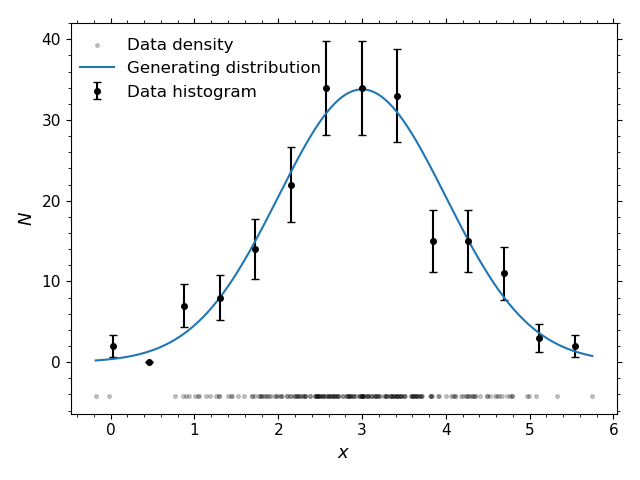

In [8]:
from scipy.stats import norm
    
# make the plot figure and axis
fig = plt.figure('Data Visualisation')
ax = fig.add_subplot()
       
# histogram the data (note I make use of the Freedman-Draconis rule
# to determine the binning)
nh, xe = np.histogram(data, bins="fd")
    
# get the histogram bin centres
cx = 0.5*(xe[:-1]+xe[1:])
    
# draw the histogram entries as points with error bars
# each histogram bin is a count of events so the error
# in each bin is Poisson in nature and given by the square
# root of the number
ax.errorbar(cx, nh, yerr=nh**0.5, fmt='ko', markersize=4, capsize=3, label='Data histogram')
    
# make a little scatter plot to show where the data fall
scat_y = np.full_like(data, -ax.get_ylim()[1]*0.1)
ax.scatter(data,scat_y, s=7, alpha=0.2, color='k', label='Data density')
    
# overlay the true distribution we generated from
    
# create a linear space along the x axis
x = np.linspace(xe[0],xe[-1],400)
    
# compute the true probability of each value
# given we know the true Gaussian distribution
# we generated from
y = norm(3,1).pdf(x)
    
# calculate the proper normalisation given the bin width
# and number of events
N = len(data)*(xe[1]-xe[0])
    
# plot it
ax.plot(x,N*y, label='Generating distribution')
    
# make a legend
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=[-0.01,1])
    
# set some axis labels
ax.set_xlabel('$x$')
ax.set_ylabel('$N$')


**Step 2.** Now lets compute our new friend the <font color='blue'>likelihood</font>
- In this case we will use the <font color='red'>normal distribution</font> as our <font color='red'>likelihood model</font> so that
$$ L(\mu,\sigma | X) = \prod_i p(X_i; \mu,\sigma) = \prod_{i}^{N=200} \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{(X_i-\mu)^2}{2\sigma^2}\right] $$


In [9]:
def our_likelihood(mu, sigma):
    N = 1 / ( sigma * np.sqrt( 2 * np.pi ) )
    pdf = N * np.exp( -(data-mu)**2 / (2*sigma**2) )
    return np.prod(pdf)

(0.8, 1.2)

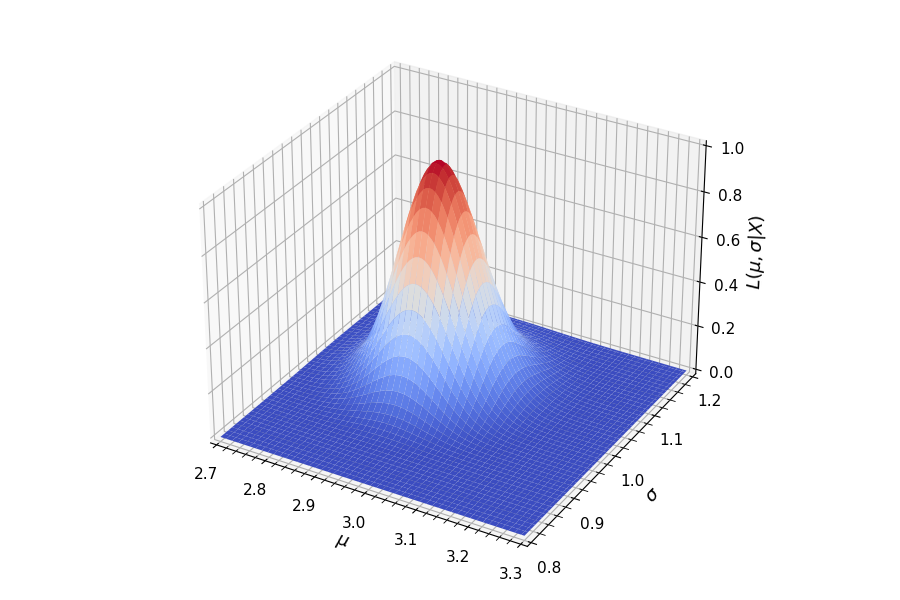

In [10]:
from matplotlib import cm

# parameter ranges
mu_range = (2.7,3.3)
sg_range = (0.8,1.2)

    
# make the plot figure and axis
fig = plt.figure('Our Likelihood', figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')  

# make linear spaces
x = np.linspace(*mu_range,100)
y = np.linspace(*sg_range,100)
    
# mesh these into a grid
X, Y = np.meshgrid(x,y)
    
# the `our_likelihood()` method is not vectorised
# in other words it expects its arguments (mu, sigma)
# to be scalars (just numbers). passing vectors will
# confuse it because it doesn't know how to perform
# `data-mu` or what dimension to perform the prod on
# we can make a vectorised version (note, this is a 
# wrapper that will not increase performance)
vec_our_likelihood = np.vectorize( our_likelihood )
    
# draw the surface
Z = vec_our_likelihood(X,Y)
# scale it to have a max of one so the plot axis isn't silly
Z /= np.max(Z)
    
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm )
    
# set some axis labels
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$L(\mu,\sigma|X)$')
    
# tidy axes
ax.set_xticks(np.linspace(*mu_range,7))
ax.set_yticks(np.linspace(*sg_range,5))
ax.set_xlim(mu_range)
ax.set_ylim(sg_range)


 - For simplicity let's reduce this two-dimensional problem ($\mu$ and $\sigma$) to a <font color='blue'>one-dimensional problem</font>
 - Assume we know the <font color='blue'>true value</font>, $\sigma=1$, so now $L$ only depends on $\mu$
 - $L(\mu|X)$ will itself be a <font color='blue'>normal distribution</font> with a mean equal to the **sample mean of our data** and a width of the **standard error on the mean** (<font color='red'>this is <b>not</b> a width  of $\sigma=1$</font>)

**Step 3.** Investigate various choices of priors
1. Start with a <font color='blue'>uniform prior</font> (we have no knowledge) - give a wide range $2.7 \leq \mu \leq 3.3$
2. Use a <font color='green'>wide (non-informative) prior</font>, $p(\mu) = \text{Norm}(3.3,0.4)$
3. Use an <font color='red'>informative prior</font>, perhaps based on a previous measurement, $p(\mu) = \text{Norm}(2.8,0.15)$
4. Use a <font color='magenta'>very informative prior</font>, with a narrow width, $p(\mu) = \text{Norm}(3.1,0.03)$

<img src="plots/PriorSketch.png" alt="drawing">

In [11]:
# define the uniform and normal distributions
# (note we could get these from scip.stats or numba_stats)

def uniform(x,a,b):
    return np.full_like(x,1/(b-a))

def normal(x,mu,sg):
    return 1/(sg*np.sqrt(2*np.pi)) * np.exp( -((x-mu)**2)/(2*sg**2) )

# make a list of our prior means and widths
# the first one is just the range of the uniform prior
prior_opts = [ (2.7,3.3), 
               (3.3,0.4),
               (2.8,0.15),
               (3.1,0.03),
             ]

# make the list of prior functions
priors = [ lambda x: uniform(x,*prior_opts[0]),
           lambda x: normal(x,*prior_opts[1]),
           lambda x: normal(x,*prior_opts[2]),
           lambda x: normal(x,*prior_opts[3])
         ]

# make the 1d likelihood function
lmu = np.mean(data)
lsg = 1/np.sqrt(len(data))
likelihood = lambda x: normal(x, lmu, lsg)

# compute the posterior distribution
# these will also be normally distributed 
# becuase the product of a normal and uniform
# is normal and the product of two normals is also
# normal
posterior_opts = [ (lmu, lsg) ]

for propt in prior_opts[1:]:
    pmu = propt[0]
    psg = propt[1]
    
    nmu = (lmu*psg**2 + pmu*lsg**2) / (psg**2 + lsg**2)
    nsg = np.sqrt( (psg**2 *lsg**2) / (psg**2 + lsg**2) )
    
    posterior_opts.append( (nmu, nsg) )

# make the posterior list
posteriors = [ lambda x: normal(x, lmu, lsg), 
               lambda x: normal(x, *posterior_opts[1]),
               lambda x: normal(x, *posterior_opts[2]),
               lambda x: normal(x, *posterior_opts[3]),
             ]

# list the prior names
labels = [ 'uniform', 'wide', 'narrow', 'very narrow' ]


Text(0.5, 1.0, 'Posterior')

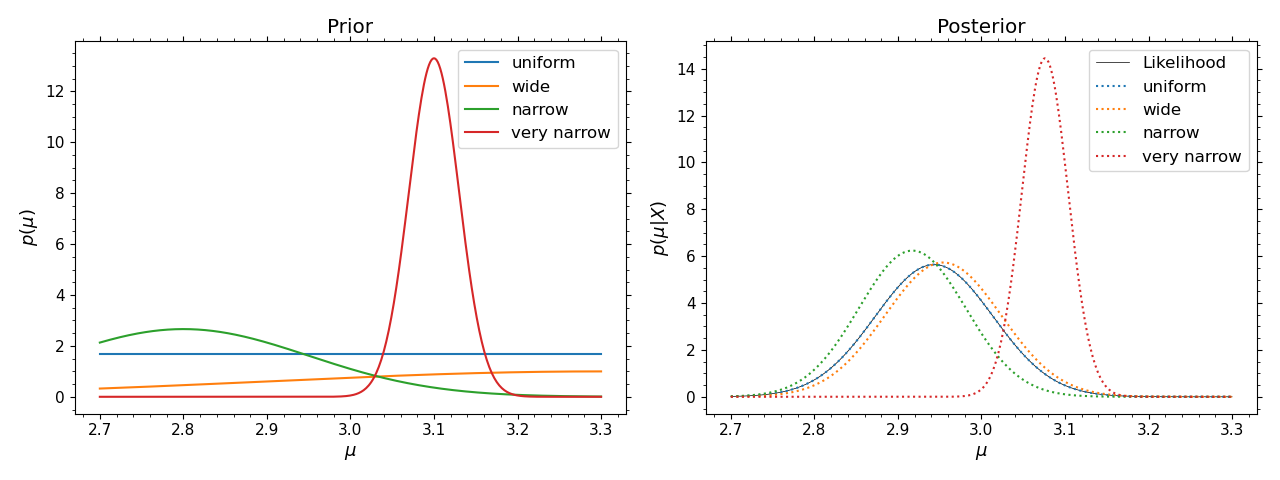

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12.8,4.8))
x = np.linspace(2.7,3.3,400)

# priors
for prior, label in zip(priors, labels):
    ax[0].plot( x, prior(x), label=label )
    
ax[0].legend()
ax[0].set_xlabel('$\mu$')
ax[0].set_ylabel('$p(\mu)$')
ax[0].set_title('Prior')

# likelihood
ax[1].plot(x, likelihood(x), c='k', label='Likelihood', lw=0.5)

# posteriors
for posterior, label in zip(posteriors, labels):
    ax[1].plot( x, posterior(x), label=label, ls=':' )
    
ax[1].legend()
ax[1].set_xlabel('$\mu$')
ax[1].set_ylabel('$p(\mu|X)$')
ax[1].set_title('Posterior')


### Point-estimates and intervals from the posterior

 - Now we have determined the <font color='blue'><b>posterior distribution</b></font> we can determine an <font  color='blue'><b>inferred value</b></font> and <font color='blue'><b>uncertainty</b></font> from this

<img src="plots/Wmass.png" alt="drawing">

- The <font color='red'>value</font> (or point estimate) can be the <i>mode</i>, <i>median</i>, <i>mean</i> or something else of the posterior.
   - These are all the same for a Gaussian
   - Often depends on the actual posterior distribution
   - Normally use the <font color='blue'><b>maximum a posteriori probablity (MAP)</b></font> estimate, i.e. the mode
   
<br>

- The <font color='red'>credible interval</font> is often the <font color='blue'><b>Highest Density Interval (HDI)</b>$^{[1]}$</font> but could be the *Equal-Tailed Interval (ETI)*, *RMS* or something else
   - These are all the same for a Gaussian

<br>

 - **Coding tip**: *For computing the MAP, HDI, EDI etc. I suggest taking advantage of algorithms from the excellent [`arviz`](https://arviz-devs.github.io/arviz/index.html) package*
 
 $^{[1]}$ *The narrowest interval containing $(1-\alpha)\%$ of the distribution*
    

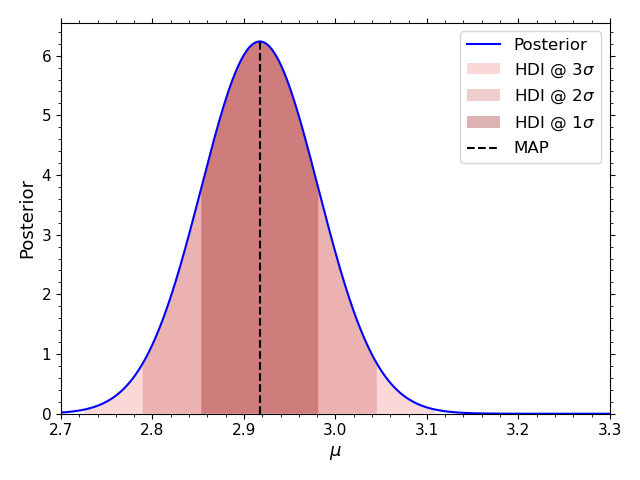

In [13]:
fig, ax = plt.subplots()
ax.plot( x, posteriors[2](x), c='b', label='Posterior' )
mu, sg = posterior_opts[2]

for sigma, col in zip([3,2,1], ['lightcoral','indianred','darkred'] ):
    xs = np.linspace( mu-sigma*sg, mu+sigma*sg, 200 )
    ax.fill_between( xs, posteriors[2](xs), fc=col, alpha=0.3, label=f'HDI @ ${sigma}\sigma$' )

ax.plot( [mu,mu], [0,posteriors[2](mu)], c='k', ls='--', label='MAP')

ax.set_xlabel('$\mu$')
ax.set_ylabel('Posterior')
ax.set_ylim(bottom=0)
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend()

# End of Lecture 4

By the end of this lecture you should:
   - Understand properties of distributions (p.d.f.s, c.d.f.s, marginal and conditional probabilities)
   - Understand what the likelihood is and be able to describe the difference between the likelihood and a p.d.f
   - Understand and be able to deploy Bayesian inference
   - Realise the impact of choice of prior on the posterior
    